In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
DTRY = yf.download("TRY=X", start="2020-01-01", end = "2023-12-15")['Adj Close']
rDTRY = DTRY.diff().dropna()

[*********************100%***********************]  1 of 1 completed


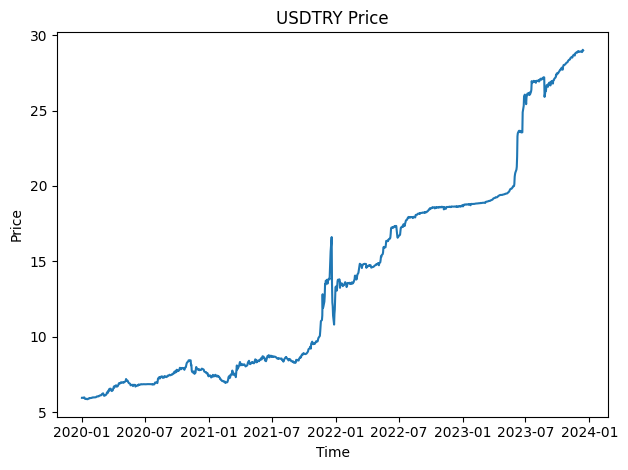

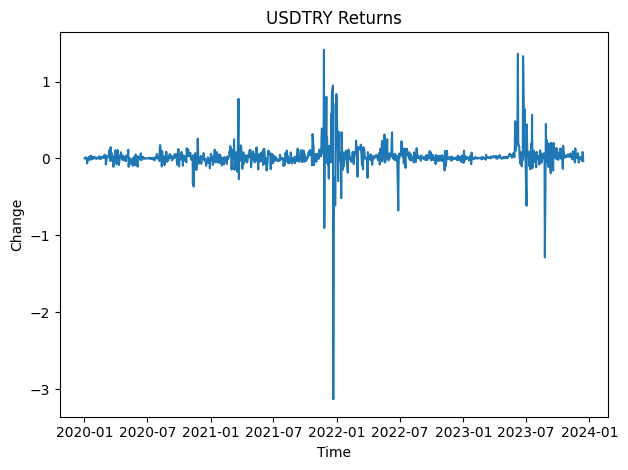

In [4]:
plt.plot(DTRY)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('USDTRY Price')
plt.tight_layout()
plt.show()

plt.plot(rDTRY)
plt.xlabel('Time')
plt.ylabel('Change')
plt.title('USDTRY Returns')
plt.tight_layout()
plt.show()

### 1) Perform KPSS and Augmented Dickey-Fuller tests on DTRY and rDTRY series. Comment. Conclude.

In [5]:
from statsmodels.tsa.stattools import kpss

In [6]:
kpss1 = kpss(DTRY, regression='ct', nlags='auto', store=False)
print(kpss1)

(0.859378076711003, 0.01, 19, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


C:\Users\emir.e\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [7]:
kpss2 = kpss(rDTRY, regression='c', nlags='legacy', store=False)
print(kpss2)

(0.3974160409056736, 0.07826894788548551, 22, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
adf1 = adfuller(DTRY, regression='ct', autolag='AIC')
print(adf1)

(-1.7636247258288458, 0.7220281335007377, 21, 1010, {'1%': -3.9677614634121485, '5%': -3.414845832687729, '10%': -3.1296138693838014}, -614.3587515900551)


In [10]:
adf2 = adfuller(rDTRY, regression='c', autolag='AIC')
print(adf2)

(-5.88621420046895, 2.997377187502574e-07, 22, 1008, {'1%': -3.4368539989632336, '5%': -2.864411567265667, '10%': -2.568298955065823}, -614.6311724018676)


#### >>>>>>>>>>>>>>>Comments needed<<<<<<<<<<<<<<<<<

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2) Plot the ACF and PACF for the rDTRY series setting the maximum lag to 12. 

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

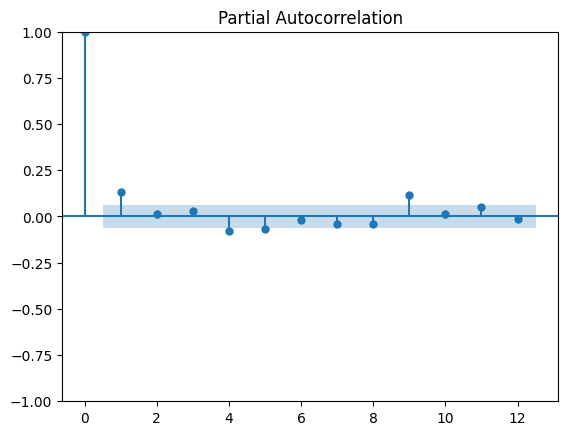

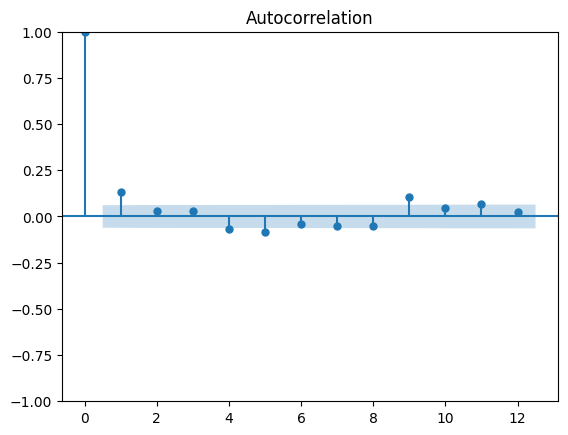

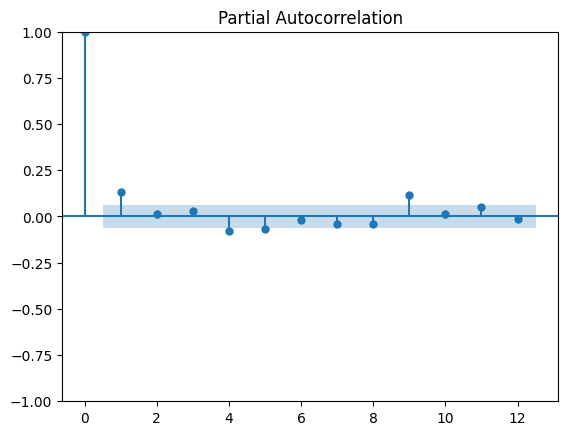

In [12]:
plot_acf(rDTRY, alpha=0.05, lags=12)
plot_pacf(rDTRY, alpha=0.05, lags=12)

#### Based on the partial autocorrelation plot showing a significant spike at lag 1 and the autocorrelation plot indicating a gradual decline for rDTRY, an AR(1) model is the most appropriate to try first. The absence of other significant spikes in the partial autocorrelation plot suggests that higher-order AR models are likely unnecessary.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3) For an AR model, which model orders would you try based on the plots you created above. Comment. 

#### Based on the partial autocorrelation plot, which shows a significant spike at lag 1 followed by non-significant values, an AR(1) model is suggested for the autoregressive process. The autocorrelation plot's gradual decline also supports the AR(1) model but is less definitive on its own. After fitting the AR(1) model, it's crucial to check the residuals to ensure the model is adequate and consider more complex models if necessary.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4) Estimate each AR model that you determined in question 3. Compare the models based on the Akaike’s information criterion. Which model would you prefer. Justify your choice. Call your preferred model m1. 

In [13]:
from statsmodels.tsa.ar_model import AutoReg

In [14]:
# AR(1)
model_ar1 = AutoReg(rDTRY, lags=1).fit()
aic_ar1 = model_ar1.aic
# AR(2)
model_ar2 = AutoReg(rDTRY, lags=2).fit()
aic_ar2 = model_ar2.aic
print(aic_ar1, aic_ar2)

-608.9630214944169 -605.5188012663921


C:\Users\emir.e\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\emir.e\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


#### Since aic_ar1 < aic_ar2, we select AR(1)

In [15]:
print(model_ar1.summary())

                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                 1031
Model:                     AutoReg(1)   Log Likelihood                 307.482
Method:               Conditional MLE   S.D. of innovations              0.180
Date:                Thu, 21 Dec 2023   AIC                           -608.963
Time:                        10:48:14   BIC                           -594.151
Sample:                    01-03-2020   HQIC                          -603.342
                         - 12-14-2023                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0194      0.006      3.441      0.001       0.008       0.030
Adj Close.L1     0.1331      0.031      4.310      0.000       0.073       0.194
                                    Roots   

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

### 5) Perform Ljung-Box test to check the validity of the m1 model. Comment. Conclude.

In [16]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [17]:
ljungbox_results = acorr_ljungbox(rDTRY, lags=[1], return_df=True)

In [18]:
print(ljungbox_results)

     lb_stat  lb_pvalue
1  18.312528   0.000019


#### With a Ljung-Box test statistic of approximately 18.31 and a very small p-value of about 0.000019, the test indicates that there is significant autocorrelation in the residuals of our AR(1) model at lag 1. This suggests that the model does not adequately capture all the autocorrelation in the data and may not be the best fit.

#### Given this result, we may need to consider alternative models, such as higher-order AR models, adding MA components to create an ARMA model, or even differencing the data if it is non-stationary and using an ARIMA model.